TCS-ION Remote Internship on - "Buil a Model to Classify Side Effects of a Drug"

# Dataset Description

In [ ]:
pip install Faker

In this dataset there are 12 different columns.
1.  Age (numerical): age group range of user
2.  Condition (categorical): name of condition
3.  Date (date): date of review entry
4.  Drug (categorical): name of drug
5.  DrugId (numerical): drug id
6.  EaseOfUse (numerical): 5 star rating
7.  Effectiveness (numerical): 5 star rating
8.  Review (text): patient review
9.  Satisfaction (numerical): 5 star rating
10. Sex (categorical): gender of user
11. Side (text): side effects associated with drug (if any)
12. UsefulCount (numerical): number of users who found review useful.


In [ ]:
#Import all libraries
from faker import Faker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load dataset
df=pd.read_csv(r'/content/webmd.csv')

# Data Exploration

In [ ]:
#Print first five rows
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
#find rows and columns
df.shape

(362806, 12)

# EDA

In [ ]:
#check all the informations about data like null values.range index,data type etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [ ]:
#statistical summary of dataset
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
#to check for null values
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [ ]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [ ]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [ ]:
#check for duplicated rows
duplicates=df[df.duplicated()]
print("Duplicate rows:\n",duplicates)

Duplicate rows:
                Age                                          Condition  \
12102        55-64                                High Blood Pressure   
17120        55-64                                High Blood Pressure   
21816   75 or over                                              Other   
22427        35-44                   Abnormally Long or Heavy Periods   
24302        25-34    Fungal Infection of Fingernails - Onychomycosis   
...            ...                                                ...   
339647       55-64                                     Diverticulitis   
339648       55-64                                     Diverticulitis   
343090       25-34                                 Excessive Sweating   
343390       25-34                                 Excessive Sweating   
353563       55-64  Drying and Inflammation of Cornea and Conjunct...   

              Date                                          Drug  DrugId  \
12102    5/22/2013            

In [ ]:
#to remove duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
#again check for any duplicated rows present
duplicates=df[df.duplicated()]
duplicates

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


# Univariate Analysis

Histogram

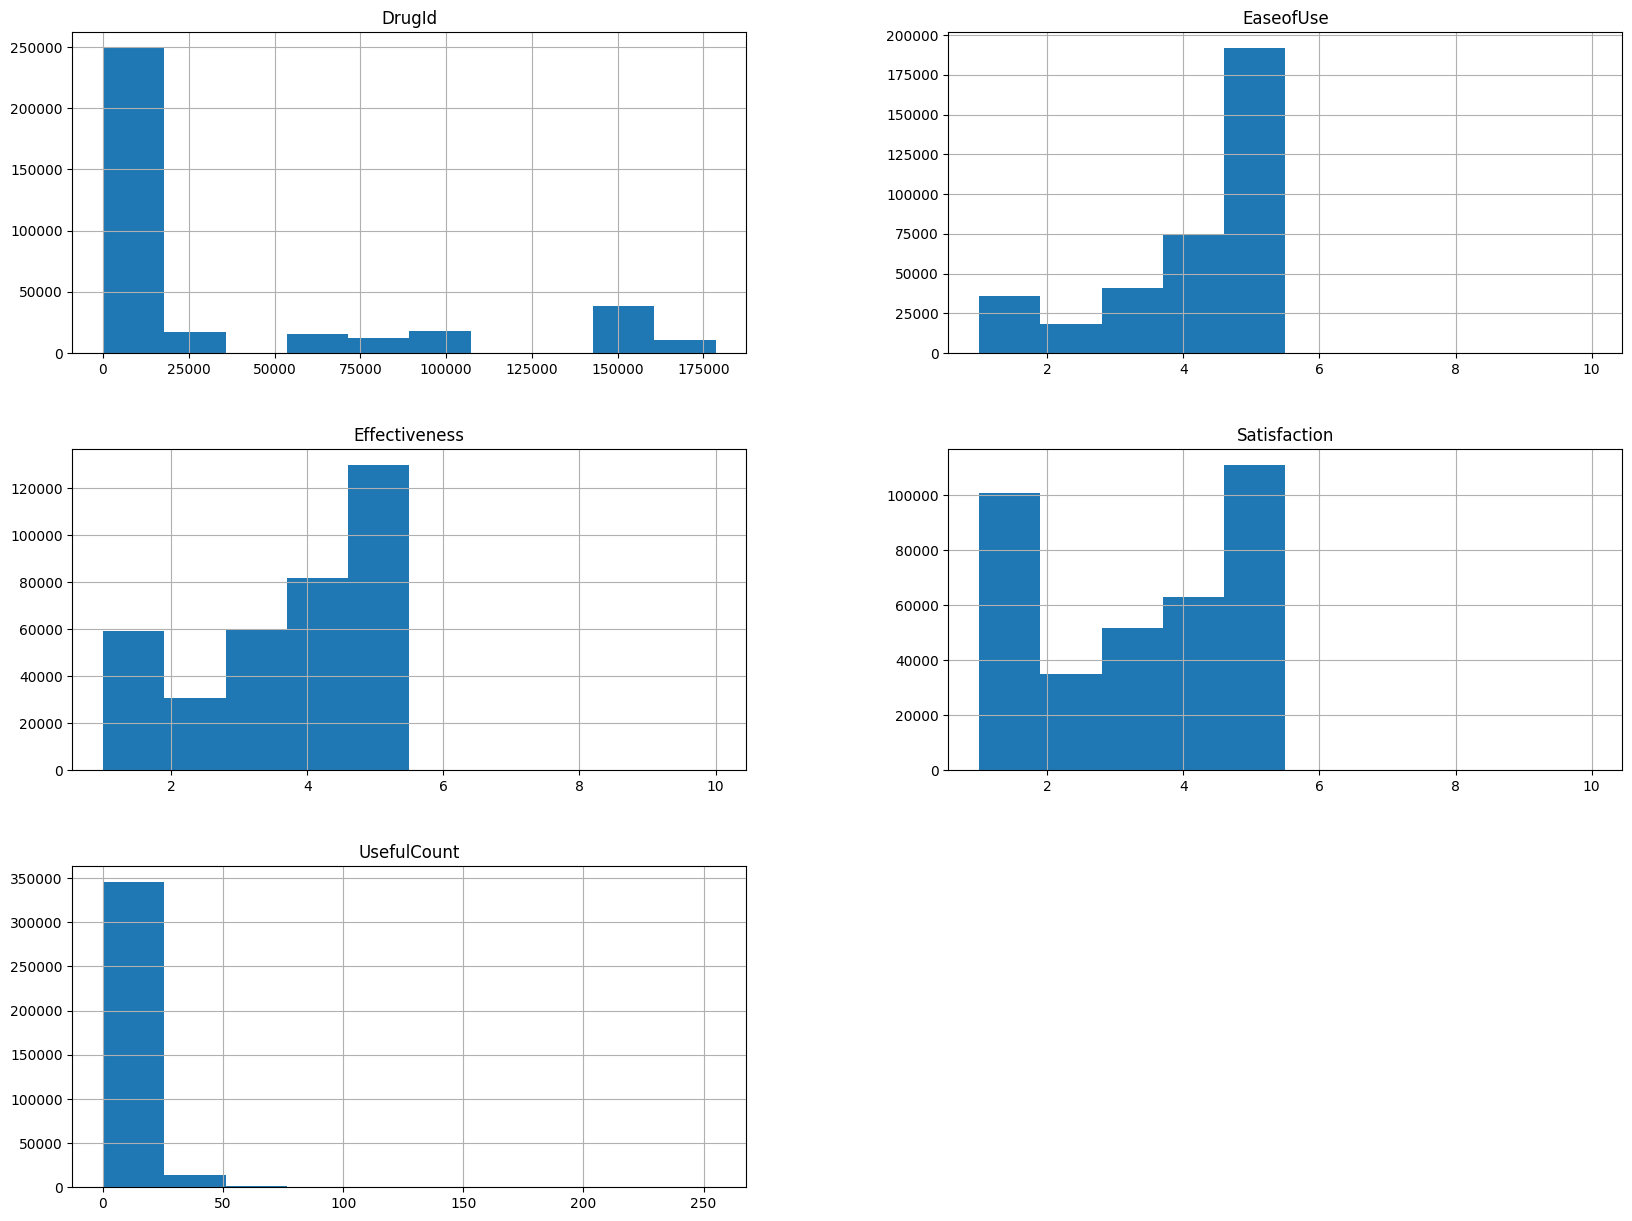

In [ ]:
freqgraph=df.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Boxplot

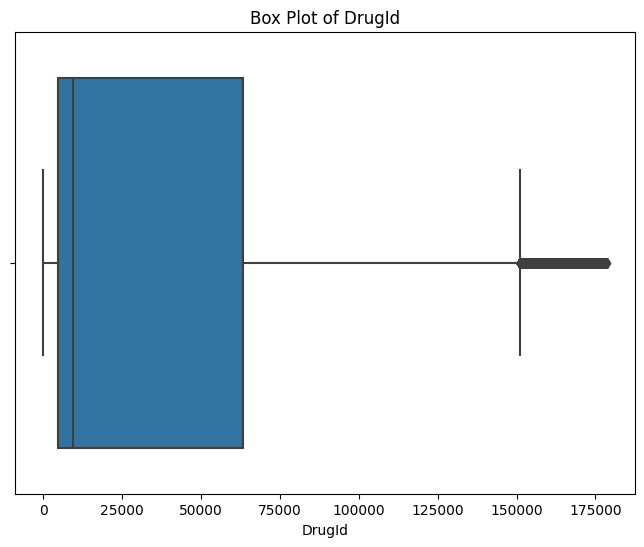

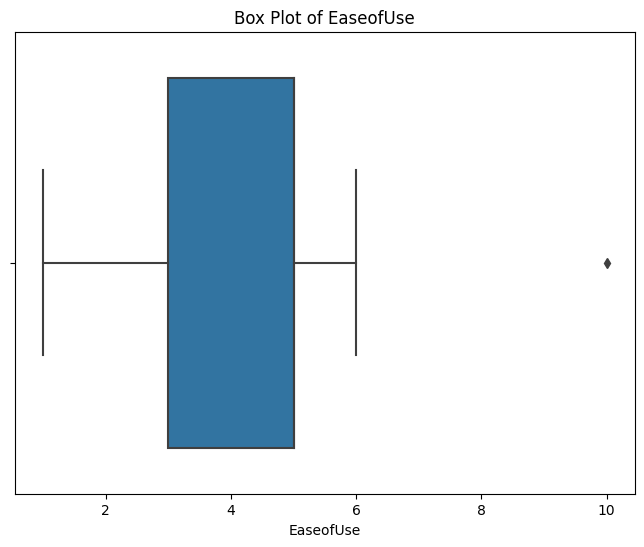

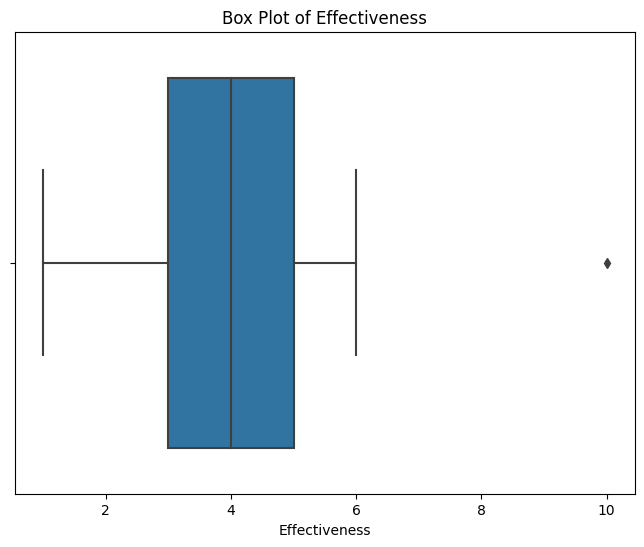

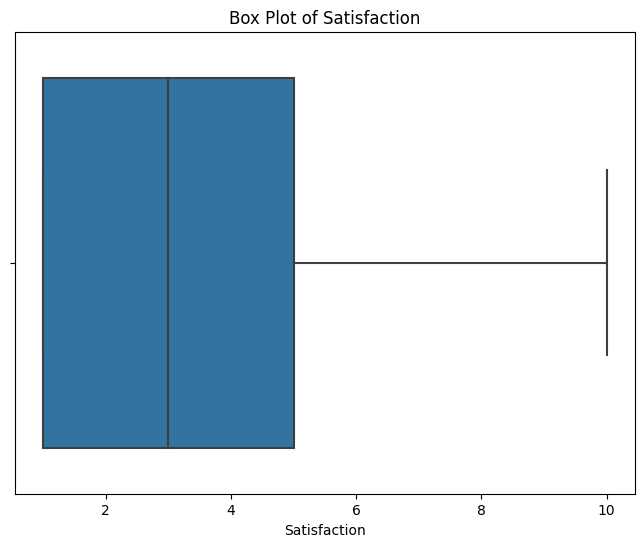

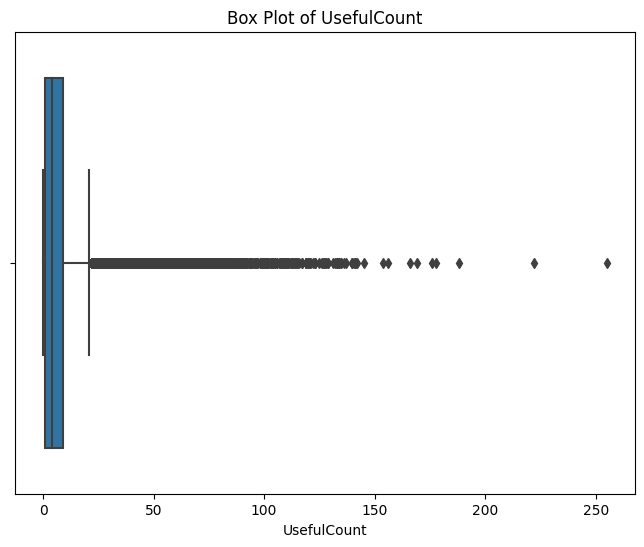

In [ ]:
# Select numeric columns for box plots
numeric_columns =df.select_dtypes(include=['float64','int64']).columns
# Plot box plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column].dropna())
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

KDE (Kernel Distribution Estimation Plot) Plot

<Axes: xlabel='UsefulCount', ylabel='Density'>

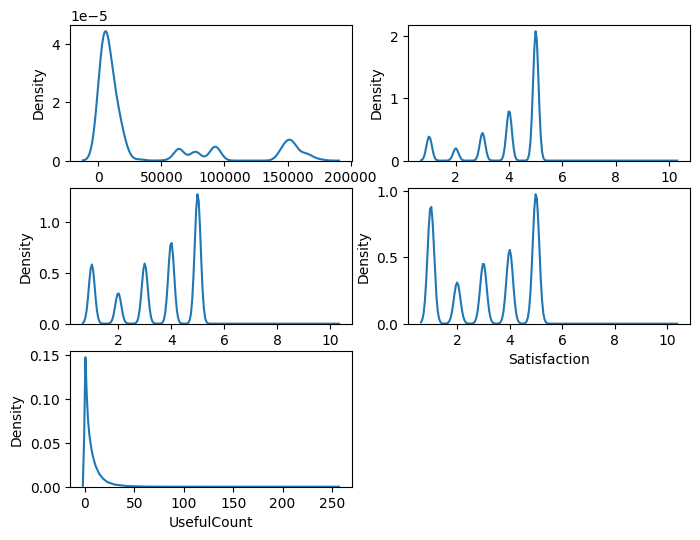

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
sns.kdeplot(x='DrugId',data=df,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='EaseofUse',data=df,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Effectiveness',data=df,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Satisfaction',data=df,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='UsefulCount',data=df,palette='Set2')

Count Plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '75 or over'),
  Text(1, 0, '25-34'),
  Text(2, 0, '65-74'),
  Text(3, 0, '35-44'),
  Text(4, 0, '55-64'),
  Text(5, 0, '45-54'),
  Text(6, 0, '19-24'),
  Text(7, 0, ' '),
  Text(8, 0, '13-18'),
  Text(9, 0, '7-12'),
  Text(10, 0, '0-2'),
  Text(11, 0, '3-6')])

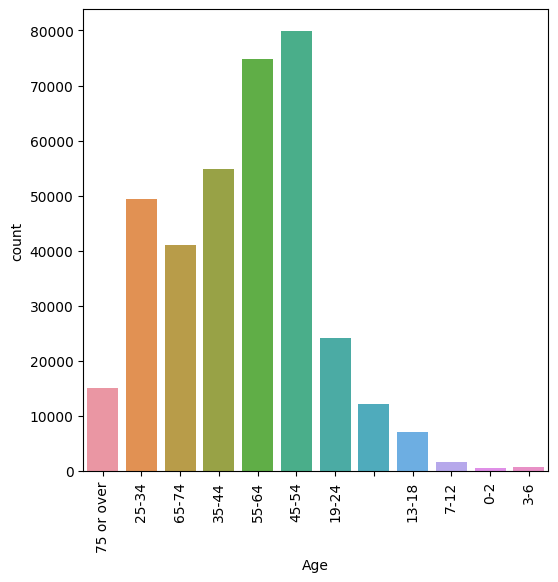

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Age', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Satisfaction', ylabel='count'>

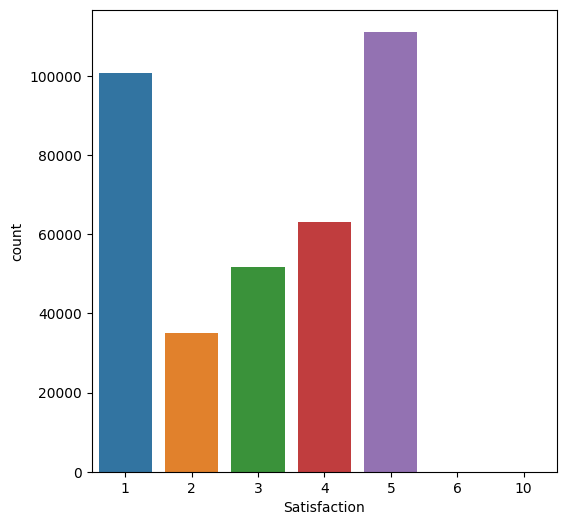

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Satisfaction', data=df)

<Axes: xlabel='Sex', ylabel='count'>

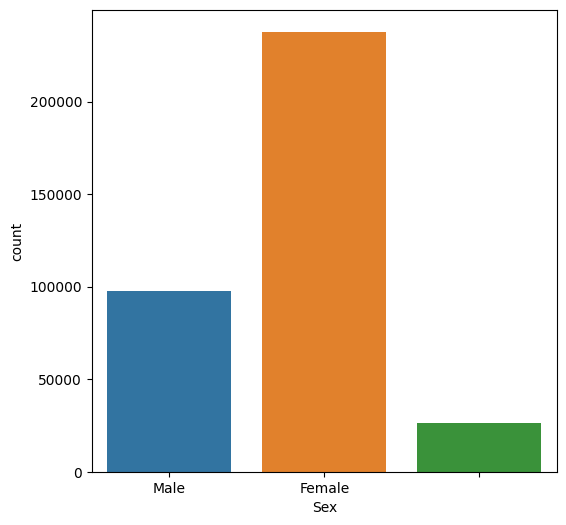

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Effectiveness', ylabel='count'>

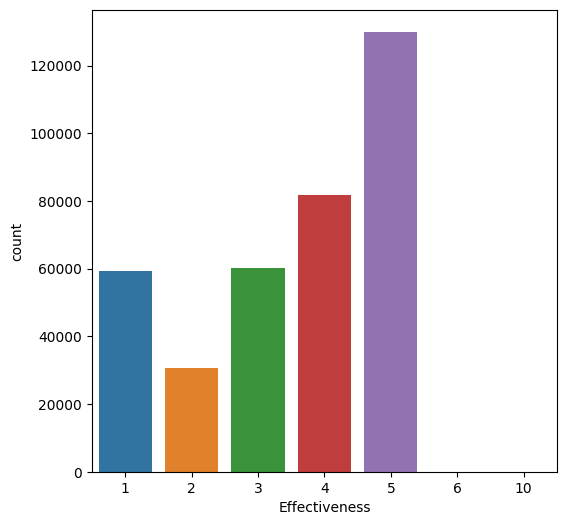

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Effectiveness', data=df)

Pie Chart for categorical datas

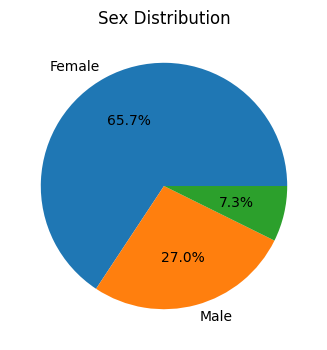

In [ ]:
# Count the occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Create a pie chart for the sex distribution
plt.figure(figsize=(8, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

Bivariate Analysis

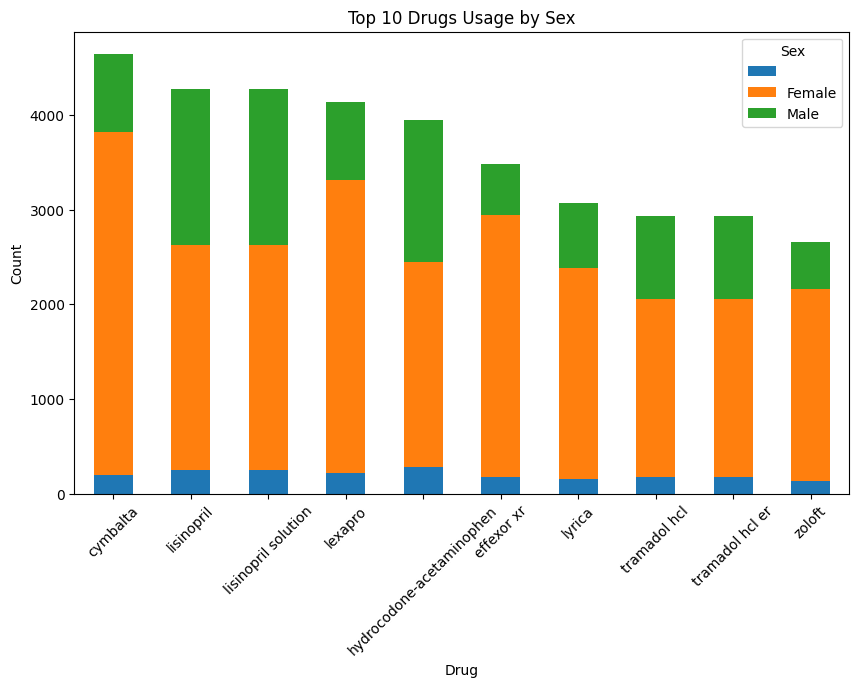

In [ ]:
drug_counts = df['Drug'].value_counts().nlargest(10)
drug_sex_counts = df.groupby(['Drug', 'Sex']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Drugs Usage by Sex')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)
plt.show()

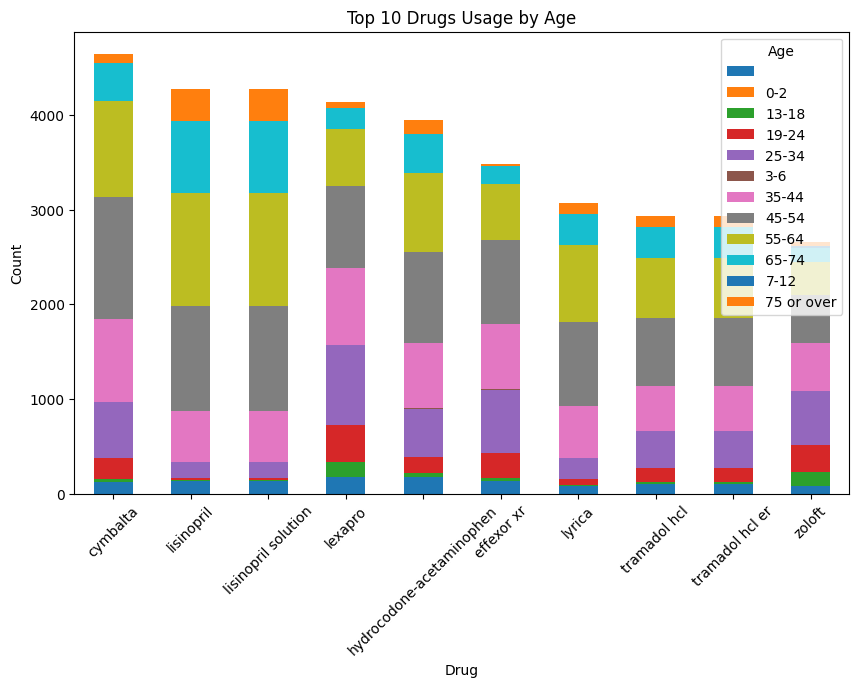

In [ ]:
drug_counts = df['Drug'].value_counts().nlargest(10)
drug_sex_counts = df.groupby(['Drug', 'Age']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs Usage by Age')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=45)
plt.show()

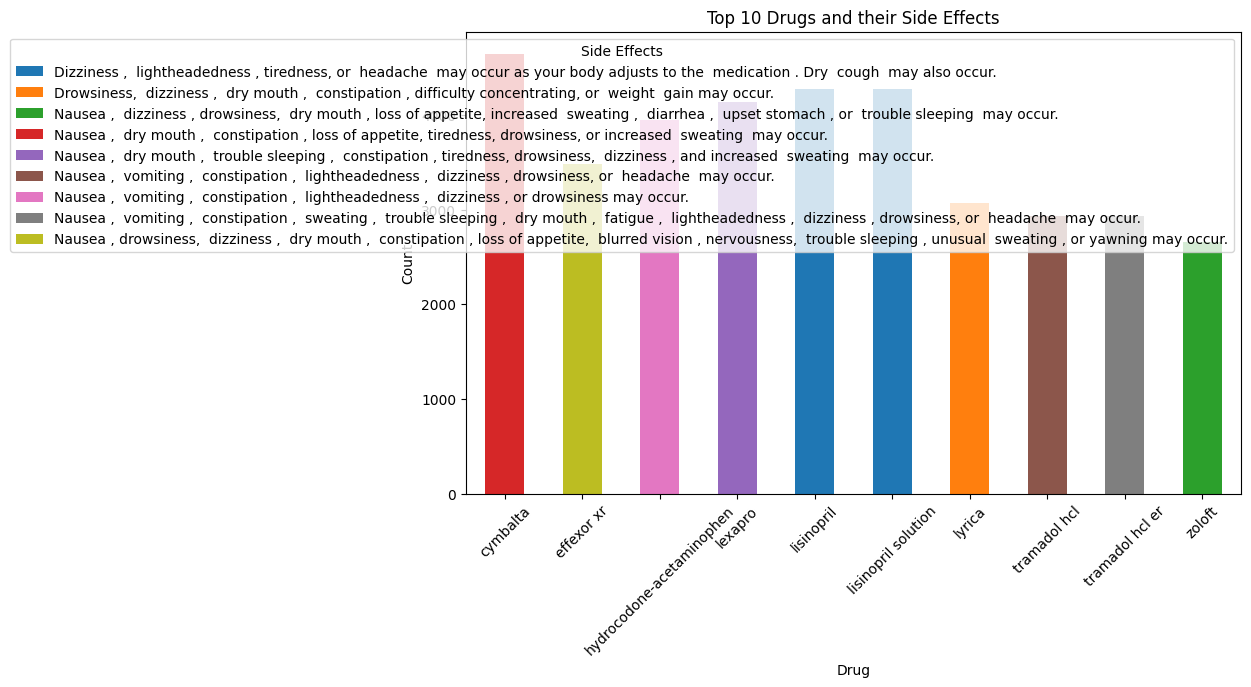

In [ ]:
drug_counts = df['Drug'].value_counts().nlargest(10)
top_drugs_df = df[df['Drug'].isin(drug_counts.index)]
drug_side_counts = top_drugs_df.groupby(['Drug', 'Sides']).size().unstack()
drug_side_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs and their Side Effects')
plt.xlabel('Drug')
plt.ylabel('Count')

plt.legend(title='Side Effects', loc='upper right')
plt.xticks(rotation=45)

plt.show()


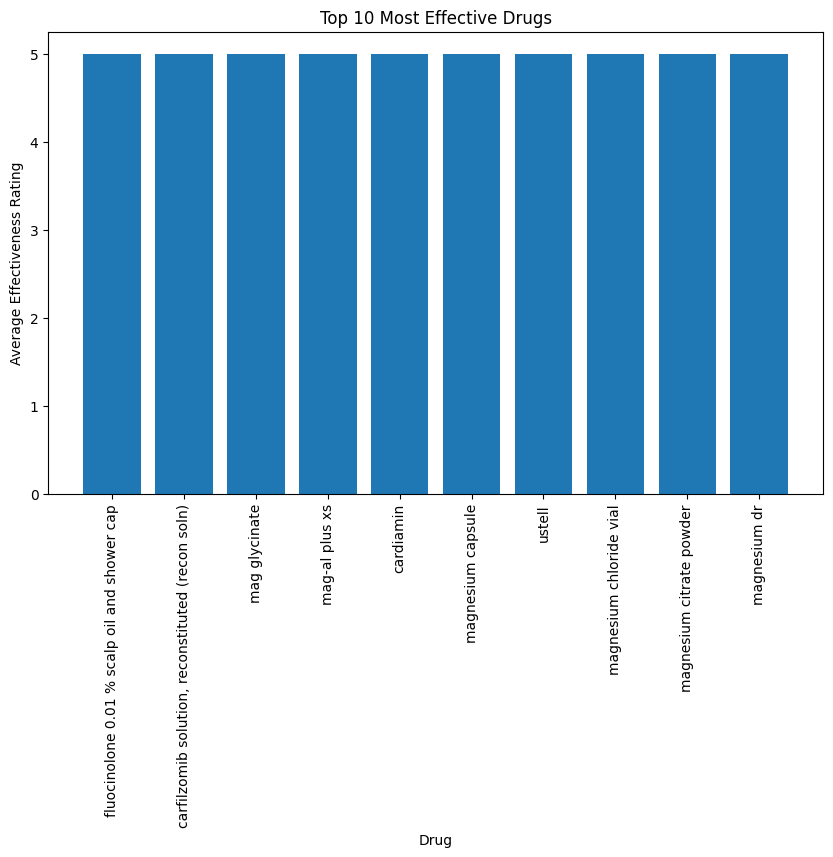

In [ ]:
# Group the data by 'Drug' and calculate the average effectiveness rating for each drug
drug_effectiveness = df.groupby('Drug')['Effectiveness'].mean().sort_values(ascending=False)

# Get the top 10 most effective drugs
top_10_drugs = drug_effectiveness.head(10)

# Plot a bar chart to visualize the effectiveness ratings of the top 10 drugs
plt.figure(figsize=(10, 6))
plt.bar(top_10_drugs.index, top_10_drugs.values)

plt.title('Top 10 Most Effective Drugs')
plt.xlabel('Drug')
plt.ylabel('Average Effectiveness Rating')

plt.xticks(rotation=90)

plt.show()

Multivariate Analysis

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.019881,-0.011821,-0.036457,0.011104
EaseofUse,-0.019881,1.000000,0.552332,0.563784,0.028080
Effectiveness,-0.011821,0.552332,1.000000,0.793096,0.047670
Satisfaction,-0.036457,0.563784,0.793096,1.000000,0.018293
UsefulCount,0.011104,0.028080,0.047670,0.018293,1.000000


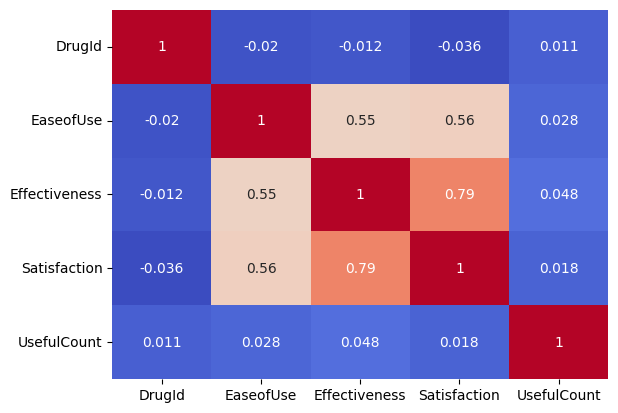

In [ ]:
# Heatmap
corr=df.corr()
sns.heatmap(corr,annot=True,cbar=False,cmap= 'coolwarm')
corr

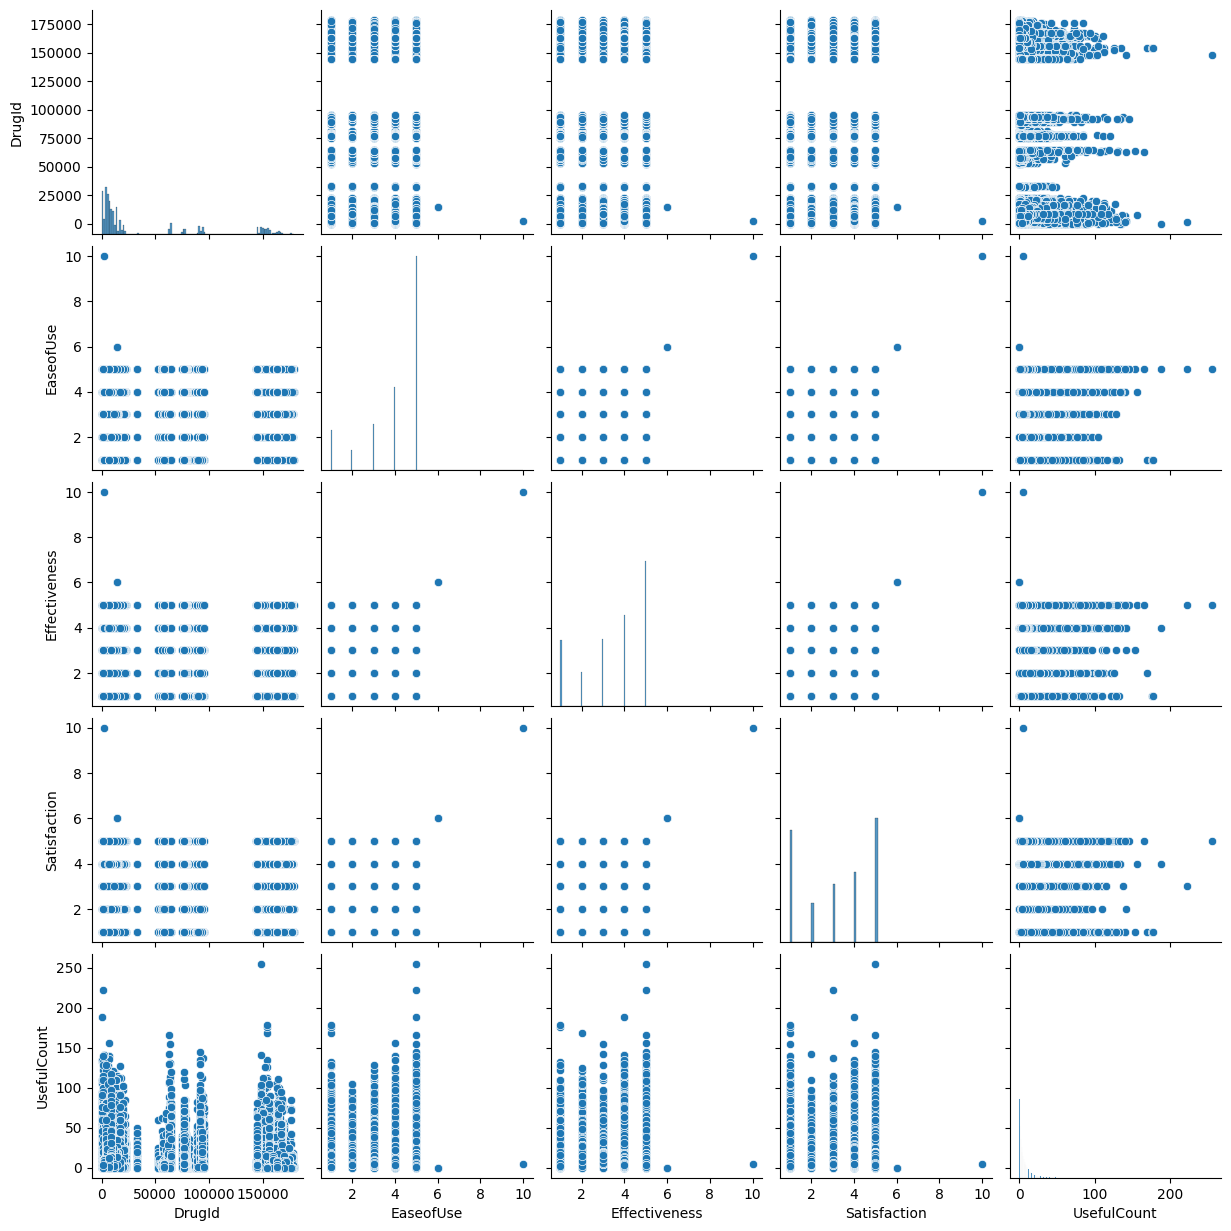

In [ ]:
#Pair Plot
sns.pairplot(df)

# Data Preprocessing

# Handling Null Values

Here we have null values in column names' Review'.We need to remove it by drop.

In [ ]:
df_new = df.dropna(subset=['Reviews'])

In [ ]:
df_new.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# Handling Unwanted Labels and Whitespaces

In [ ]:
df_new['Effectiveness'].unique()

array([ 5,  3,  2,  1,  4,  6, 10])

In [ ]:
df_new['EaseofUse'].unique()

array([ 5,  2,  1,  4,  3,  6, 10])

In [ ]:
df_new['Satisfaction'].unique()

array([ 5,  3,  1,  4,  2,  6, 10])

Effectiveness, EaseofUse, Satisfaction are 5 star ratings. So numbers in those columns will be 1 to 5. But here we can see 6 and 10. We are going to remove those rows.

In [ ]:
df_new[df_new['Effectiveness']==6].index

Int64Index([195073, 195282], dtype='int64')

In [ ]:
df_new[df_new['Effectiveness']==6].index

Int64Index([195073, 195282], dtype='int64')

In [ ]:
df_new[df_new['Effectiveness']==6].index

Int64Index([195073, 195282], dtype='int64')

In [ ]:
df_new[df_new['EaseofUse']==10].index

Int64Index([273577], dtype='int64')

In [ ]:
df_new[df_new['Satisfaction']==6].index

Int64Index([195073, 195282], dtype='int64')

In [ ]:
df_new[df_new['Satisfaction']==10].index

Int64Index([273577], dtype='int64')

In [ ]:
df_new=df_new.drop([195073, 195282,273577])

In [ ]:
df_new['Effectiveness'].unique()

array([5, 3, 2, 1, 4])

In [ ]:
df_new['EaseofUse'].unique()

array([5, 2, 1, 4, 3])

In [ ]:
df_new['Satisfaction'].unique()

array([5, 3, 1, 4, 2])

In [ ]:
df_new['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

In [ ]:
df_new[df_new['Age']== ' '].index

Int64Index([    12,     73,     91,    184,    185,    209,    325,    511,
               587,    589,
            ...
            362236, 362350, 362405, 362425, 362450, 362517, 362571, 362598,
            362645, 362802],
           dtype='int64', length=12145)

In [ ]:
ind1=df_new[df_new['Age']== ' '].index

In [ ]:
df_new['Age'].mode()

0    45-54
Name: Age, dtype: object

In [ ]:
df_new['Age'][ind1]='45-54'

In [ ]:
df_new[df_new['Age']== ' '].index

Int64Index([], dtype='int64')

In [ ]:
df_new['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [ ]:
df_new[df_new['Sex']== ' '].index

Int64Index([    11,     14,     15,     17,     20,     22,     24,     31,
                33,     34,
            ...
            362405, 362414, 362450, 362488, 362517, 362571, 362645, 362673,
            362800, 362802],
           dtype='int64', length=26433)

In [ ]:
ind2=df_new[df_new['Sex']== ' '].index

In [ ]:
df_new['Sex'].mode()

0    Female
Name: Sex, dtype: object

In [ ]:
df_new['Sex'][ind2]='Female'

In [ ]:
df_new[df_new['Sex']== ' '].index

Int64Index([], dtype='int64')

In [ ]:
df_new['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [ ]:
df_new[df_new['Condition']== ' '].index

Int64Index([ 31316,  37013,  37117,  49273,  52267,  63607,  63676,  63722,
             68864,  71020,  75003,  90380,  90512,  90777,  98289,  98440,
            105702, 113904, 118300, 118311, 121989, 135173, 140701, 144696,
            171731, 186903, 190720, 223756, 223764, 224266, 225702, 229030,
            229086, 239316, 263893, 264204, 282976, 301436, 326306, 336975,
            342915, 342937, 347026],
           dtype='int64')

In [ ]:
ind3=df_new[df_new['Condition']== ' '].index

In [ ]:
df_new=df_new.drop(ind3)

In [ ]:
df_new.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Encoding

In this case , use Label encoding & Onehot Encoding to resolve this.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame with the original columns
encoded_df = df.copy()

# Encode the "Reviews" column
review_encoder = LabelEncoder()
encoded_df['Reviews'] = review_encoder.fit_transform(df['Reviews'])

# Encode the "Sides" column
sides_encoder = LabelEncoder()
encoded_df['Sides'] = sides_encoder.fit_transform(df['Sides'])
encoded_df = pd.get_dummies(encoded_df, columns=['Age'])

In [ ]:
encoded_df.head()

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
0,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,128864,5,Male,413,...,0,0,0,0,0,0,0,0,0,1
1,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,214157,5,Female,413,...,0,0,1,0,0,0,0,0,0,0
2,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,248797,3,Female,0,...,0,0,0,0,0,0,0,1,0,0
3,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,25014,1,Female,0,...,0,0,0,0,0,0,0,0,0,1
4,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,157693,1,Male,0,...,0,0,0,0,1,0,0,0,0,0


# Outlier Detection

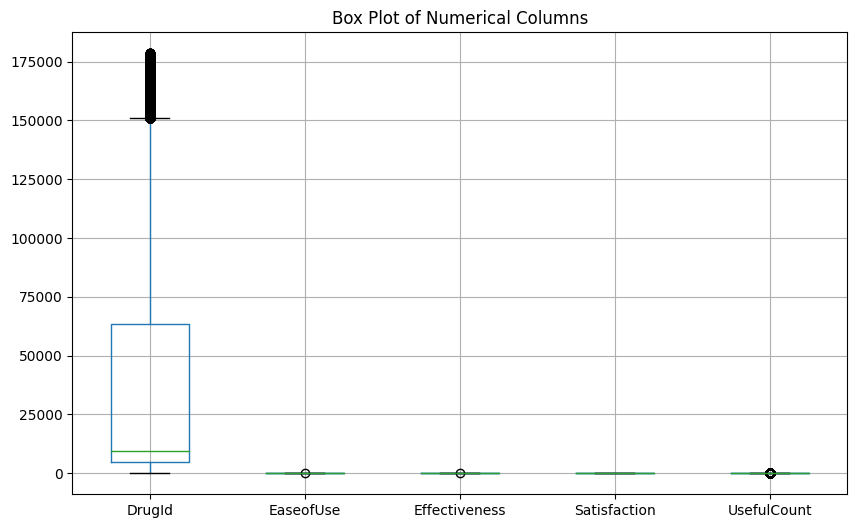

In [ ]:
# Select only the numerical columns
numerical_cols = encoded_df.select_dtypes(include=['int64', 'float64']).columns

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.show()

# Treating outliers

In [ ]:
#DrugId
IQR=stats.iqr(encoded_df.DrugId,interpolation="midpoint")
IQR

58514.0

In [ ]:
Q1=encoded_df.DrugId.quantile(0.25)
Q3=encoded_df.DrugId.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-82875.0, 151181.0)

In [ ]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.DrugId>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
6,Birth Control,6/15/2017,wymzya fe,163180,5,5,34342,2,Female,1044,...,0,0,1,0,0,0,0,0,0,0
7,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,89028,5,Female,1044,...,0,0,0,0,0,1,0,0,0,0
8,Acne,4/27/2016,wymzya fe,163180,4,2,174,2,Female,1044,...,0,0,1,0,0,0,0,0,0,0
11,Birth Control,11/17/2018,lyza,164750,5,5,177490,2,,1043,...,0,1,0,0,0,0,0,0,0,0
12,Birth Control,7/3/2018,lyza,164750,2,1,195236,1,Female,1043,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361701,Birth Control,11/20/2013,chateal,163265,4,4,93273,3,Female,1044,...,0,1,0,0,0,0,0,0,0,0
361703,Birth Control,10/7/2013,chateal,163265,3,4,11887,1,Female,1044,...,0,0,1,0,0,0,0,0,0,0
361704,Birth Control,9/16/2013,chateal,163265,1,1,157782,1,Female,1044,...,0,0,1,0,0,0,0,0,0,0
361705,Birth Control,9/9/2013,chateal,163265,1,3,97404,2,Female,1044,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
encoded_df.loc[encoded_df.DrugId<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
encoded_df.loc[encoded_df['DrugId']>max_limit,['DrugId']]=np.median(encoded_df['DrugId'])

In [ ]:
encoded_df.loc[encoded_df.DrugId>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
#EaseofUse
IQR=stats.iqr(encoded_df.EaseofUse,interpolation="midpoint")
IQR

2.0

In [ ]:
Q1=encoded_df.EaseofUse.quantile(0.25)
Q3=encoded_df.EaseofUse.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 8.0)

In [ ]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.EaseofUse>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
273577,Other,6/12/2013,fiorinal with codeine #3,2421,10,10,1743,10,,1080,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
encoded_df.loc[encoded_df.EaseofUse<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
encoded_df.loc[encoded_df['EaseofUse']>max_limit,['EaseofUse']]=np.median(encoded_df['EaseofUse'])

In [ ]:
encoded_df.loc[encoded_df.EaseofUse>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
#Effectiveness
IQR=stats.iqr(encoded_df.Effectiveness,interpolation="midpoint")
IQR

2.0

In [ ]:
Q1=encoded_df.Effectiveness.quantile(0.25)
Q3=encoded_df.Effectiveness.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 8.0)

In [ ]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.Effectiveness>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
273577,Other,6/12/2013,fiorinal with codeine #3,2421,5,10,1743,10,,1080,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
encoded_df.loc[encoded_df.Effectiveness<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
encoded_df.loc[encoded_df['Effectiveness']>max_limit,['Effectiveness']]=np.median(encoded_df['Effectiveness'])

In [ ]:
encoded_df.loc[encoded_df.Effectiveness>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
#UsefulCount
IQR=stats.iqr(encoded_df.UsefulCount,interpolation="midpoint")
IQR

8.0

In [ ]:
Q1=encoded_df.UsefulCount.quantile(0.25)
Q3=encoded_df.UsefulCount.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-11.0, 21.0)

In [ ]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.UsefulCount>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
82,Abnormally Long or Heavy Periods,6/30/2012,lysteda,9533,4,3,57629,1,Female,1006,...,0,0,1,0,0,0,0,0,0,0
94,Abnormally Long or Heavy Periods,3/11/2012,lysteda,9533,1,1,233952,1,Female,1006,...,0,0,0,0,0,1,0,0,0,0
140,Abnormally Long or Heavy Periods,7/1/2011,lysteda,9533,5,5,22938,5,Female,1006,...,0,0,0,0,0,1,0,0,0,0
146,Abnormally Long or Heavy Periods,3/30/2011,lysteda,9533,5,4,48473,5,Female,1006,...,0,0,0,0,1,0,0,0,0,0
165,Abnormally Long or Heavy Periods,11/28/2010,lysteda,9533,5,5,199181,5,Female,1006,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362441,Stop Smoking,11/21/2007,chantix,144470,4,5,207242,1,Male,911,...,0,0,0,0,1,0,0,0,0,0
362448,Stop Smoking,11/15/2007,chantix,144470,5,5,179809,1,Female,911,...,0,0,0,0,0,1,0,0,0,0
362497,Stop Smoking,5/12/2010,chantix,144470,5,5,26216,4,Female,911,...,0,0,0,0,0,1,0,0,0,0
362516,Stop Smoking,4/2/2010,chantix,144470,3,5,108436,5,Male,911,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
encoded_df.loc[encoded_df.UsefulCount<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [ ]:
encoded_df.loc[encoded_df['UsefulCount']>max_limit,['UsefulCount']]=np.median(encoded_df['UsefulCount'])

In [ ]:
encoded_df.loc[encoded_df.Effectiveness>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


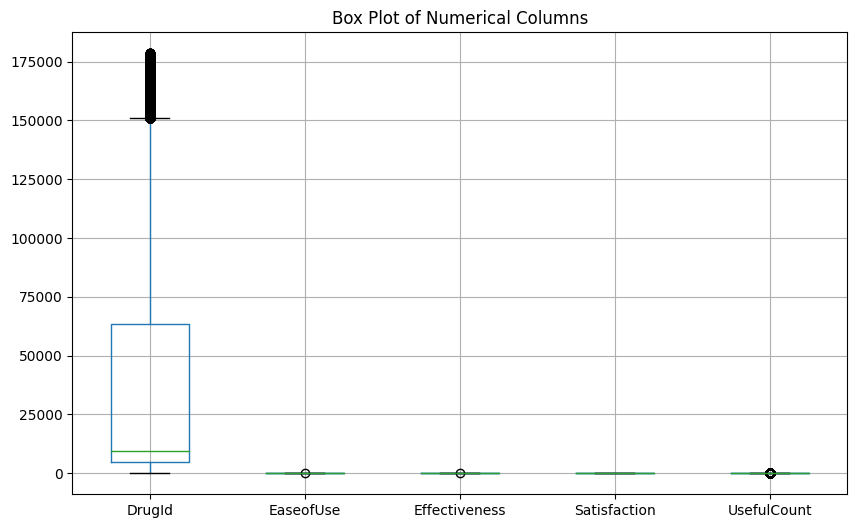

In [ ]:
# Select only the numerical columns
numerical_cols = encoded_df.select_dtypes(include=['int64', 'float64']).columns

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.show()

# Feature Engineering

# Feature Extraction

Adding Name and race columns

In [ ]:
df1 = Faker()

def create_names(n):
    name = []
    for _ in range(0, n):
        name.append(df1.name())
    return name

name_list = create_names(362806)
df_name = pd.DataFrame(name_list, columns=['Name'])

In [ ]:
df_name.head()

,Name
0,Brian Nguyen
1,Brian Williams
2,Alex Clark
3,Andrea Wilcox
4,Ricky Stuart


In [ ]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list
    #with a chocie from each population

    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'],
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [ ]:

df_race=pd.DataFrame(list, columns = ['Race'])
df_race.head()

,Race
0,White
1,White
2,Asian
3,Asian
4,Black


# Concatenating name and race columns

In [ ]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [ ]:
enoded_df=pd.read_csv(r'/content/webmd.csv')

In [ ]:
#Creating Final Dataset
encoded_df = pd.concat([df_nr, encoded_df], axis=1).reindex(encoded_df.index)

In [ ]:
encoded_df.head()

,Name,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
0,Brian Nguyen,White,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,128864.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Brian Williams,White,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,214157.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alex Clark,Asian,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,248797.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Andrea Wilcox,Asian,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,25014.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Ricky Stuart,Black,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,157693.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encode the "Name" column
Name_encoder = LabelEncoder()
encoded_df['Name'] = Name_encoder.fit_transform(encoded_df['Name'])
# Encode the "Race" column
Race_encoder = LabelEncoder()
encoded_df['Race'] = Race_encoder.fit_transform(encoded_df['Race'])
# Encode the "Race" column
Sex_encoder = LabelEncoder()
encoded_df['Sex'] = Sex_encoder.fit_transform(encoded_df['Sex'])
# Encode the "Race" column
Condition_encoder = LabelEncoder()
encoded_df['Condition'] = Condition_encoder.fit_transform(encoded_df['Condition'])

In [ ]:
encoded_df.head()

,Name,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
0,22947,3,1596,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,128864.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,23205,3,424,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,214157.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2629,0,1184,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,248797.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9130,0,1184,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,25014.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,144999,1,1184,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,157693.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Creation of New Side Effects Column

In [ ]:
data=np.where(encoded_df['Satisfaction'] == 1.0, "Nil", encoded_df['Satisfaction'])
data=np.where(encoded_df['Satisfaction'] == 2.0, "Mild",data)
data=np.where(encoded_df['Satisfaction'] == 3.0, "Moderate", data)
data=np.where(encoded_df['Satisfaction'] == 4.0, "Severe", data)
data=np.where(encoded_df['Satisfaction'] == 5.0, "Extreme",data)

In [ ]:
encoded_df['SideEffects'] = data

In [ ]:
encoded_df.head()

,Name,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over,SideEffects
0,22947,3,1596,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,128864.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Extreme
1,23205,3,424,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,214157.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extreme
2,2629,0,1184,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,248797.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Moderate
3,9130,0,1184,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,25014.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil
4,144999,1,1184,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,157693.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nil


# EDA of New Added Feature -SideEffects

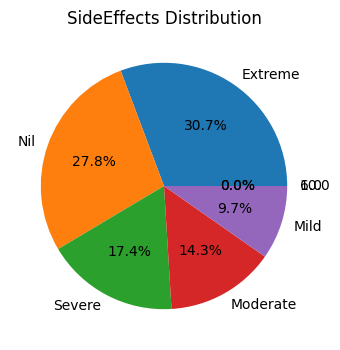

In [ ]:
# Count the occurrences of each sex
SideEffects_counts = encoded_df['SideEffects'].value_counts()

# Create a pie chart for the sex distribution
plt.figure(figsize=(8, 4))
plt.pie(SideEffects_counts, labels=SideEffects_counts.index, autopct='%1.1f%%')
plt.title('SideEffects Distribution')
plt.show()

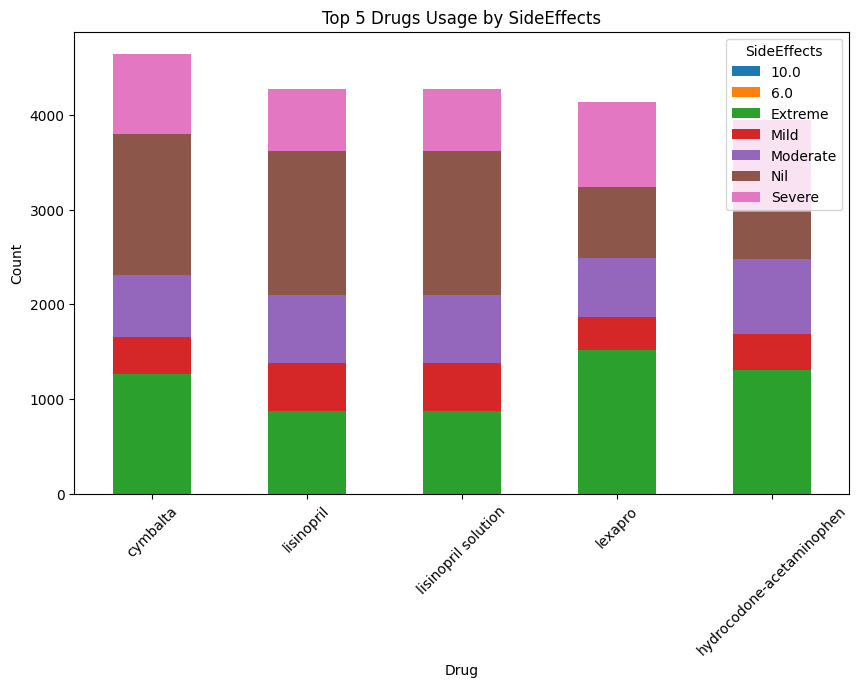

In [ ]:
drug_counts = encoded_df['Drug'].value_counts().nlargest(5)
drug_sex_counts = encoded_df.groupby(['Drug', 'SideEffects']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 5 Drugs Usage by SideEffects')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='SideEffects', loc='upper right')
plt.xticks(rotation=45)
plt.show()

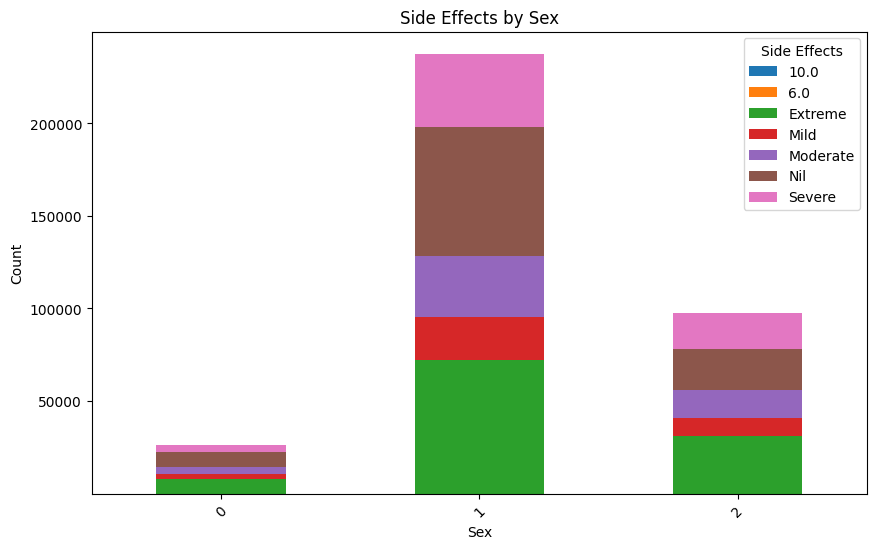

In [ ]:
age_sideeffect_counts = encoded_df.groupby(['Sex', 'SideEffects']).size().unstack()
age_sideeffect_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Side Effects by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Side Effects', loc='upper right')
plt.xticks(rotation=45)
plt.show()


# Feature Reduction

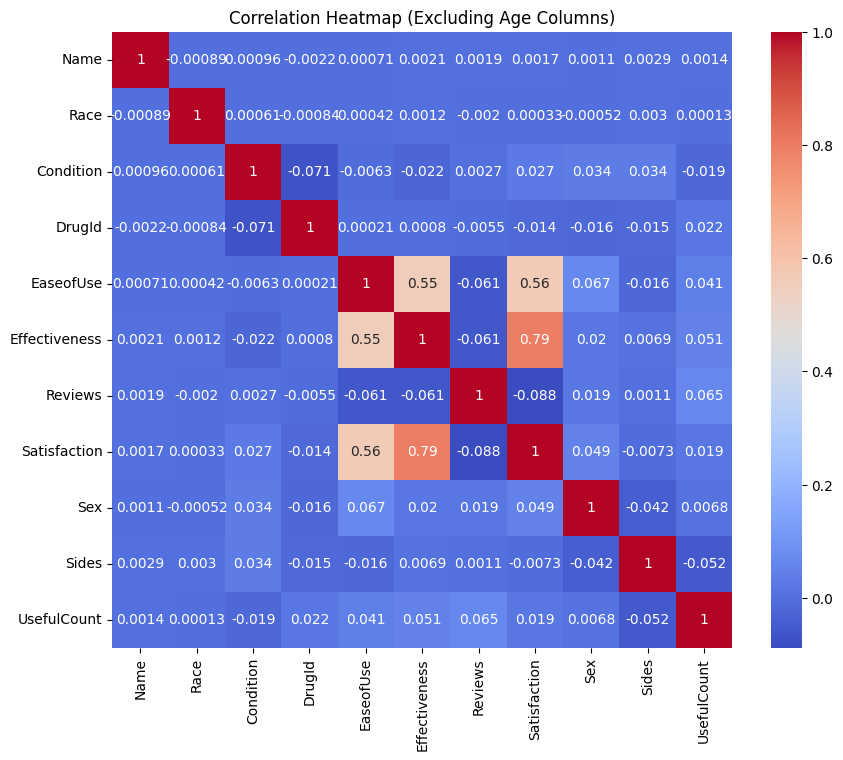

In [ ]:
# Identify the age columns to exclude
age_columns = [col for col in encoded_df.columns if col.startswith('Age_')]

# Create a copy of the encoded dataframe excluding the age columns
heatmap_df = encoded_df.drop(columns=age_columns)

# Compute the correlation matrix
correlation_matrix = heatmap_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Excluding Age Columns)')
plt.show()

# Here we can drop Date, Name, Drug Id, Reviews, Satisfaction, UsefulCount,Sides as it has no significance with side effects .

In [ ]:
encoded_df=encoded_df.drop(columns = ['Name','Date','Drug','Sides','DrugId','Reviews','Satisfaction','UsefulCount'],axis=1)
encoded_df=encoded_df.reset_index(drop=True)
encoded_df.head()

,Race,Condition,EaseofUse,Effectiveness,Sex,Age_,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over,SideEffects
0,3,1596,5.0,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Extreme
1,3,424,5.0,5.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extreme
2,0,1184,2.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Moderate
3,0,1184,2.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil
4,1,1184,1.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nil


### Splitting dataset For Training and Testing

In [ ]:
#target & predict values are assigned to variables y and x respectively'
y=encoded_df["SideEffects"]
x=encoded_df.drop("SideEffects",axis=1)
y

0          Extreme
1          Extreme
2         Moderate
3              Nil
4              Nil
            ...   
361858     Extreme
361859         Nil
361860        Mild
361861     Extreme
361862     Extreme
Name: SideEffects, Length: 361863, dtype: object